# Medical Cost Data By kaggle


# -Content
- 본 데이터는 'medical cost'에 대한 데이터셋이다. 이 medical cost는 오로지 health insurance 가격에 의해 산정된 것이며, 
  여러가지 조건으로 분류를 해놨는데, 각 Columns들에 대해선 밑에서 설명하도록 하겠다.

# - Columns

- Das age: age of primary beneficiary
- sex: insurance contractor gender, female, male
- bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9
- children: Number of children covered by health insurance / Number of dependents
- smoker: Smoking
- region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
- charges: Individual medical costs billed by health insurance

# 2. 데이터 확인

In [24]:
import pandas as pd
import numpy as np
import matplotlib as mlp
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as missno
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings(action='ignore')

%matplotlib inline

plt.style.use('ggplot')

In [4]:
cost = pd.read_csv("insurance.csv",encoding='cp949')
cost.shape

(1338, 7)

In [5]:
cost.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


다음을 통해 

- int64 = 나이,부양가족수

- float64 = BMI,비용

* object = 성별,흡연여부,지역

과 같은 데이터 타입이 있는것을 알 수 있다.

In [6]:
cost.head(20)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [7]:
cost.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
cost.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

# 3. 데이터 클린징

### - 결측치 확인
- 결측치의 존재를 확인하기 위해 데이터프레임에 존재하는 null값을 모두 더해본 결과, 데이터 결측은 없는 것으로 확인되었다.

In [9]:
cost.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

- missno라이브러리를 통해 matrix형태로 확인해 보았다. 이 결과 또한 데이터 결측은 없는 것으로 확인되었다.

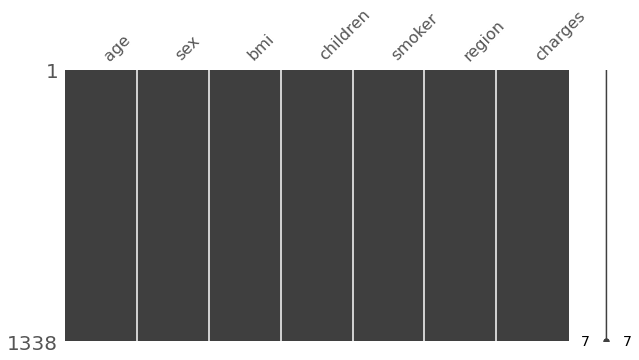

In [10]:
missno.matrix(cost,figsize=(10,5))

### - 이상치 확인

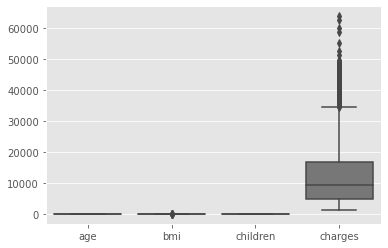

In [11]:
sns.boxplot(data = cost)

Age와 Children 같은경우 대부분 0쪽에 수렴하는데, bmi는 좀더 확인해볼 필요가 있다고 판단하여 bmi만 따로 그래프화 시켜보았다.

Text(0.5, 1.0, 'BMI Average')

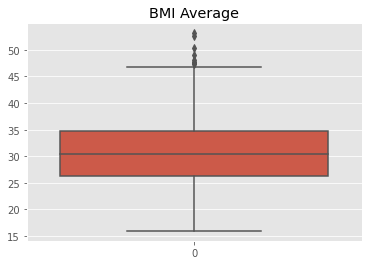

In [12]:
gp_bmi = sns.boxplot(data = cost['bmi'])
gp_bmi.set_title('BMI Average')

확인결과 최댓값을 넘어가는 값들이 많음을 확인할 수 있다.
BMI에 대한 기준은 세계기준으로 찾아보았는데,

- 세계보건기구

BMI ≥ 25 kg/m2 : 과체중

BMI ≥ 30 kg/m2 : 비만

- 세계보건기구 아시아태평양지역과 대한비만학회

BMI ≥ 23 kg/m2 : 과체중

BMI ≥ 25 kg/m2 : 비만

- 대한비만학회 비만 진료지침 2018

BMI 23-24.9 kg/m2 :비만 전 단계(과체중 or 위험체중)

BMI 25-29.9 kg/m2 :1단계비만

BMI 30-34.9 kg/m2 :2단계비만

BMI ≥ 35 kg/m2 :3단계비만(고도비만)

각 기구 최대치인  35가 넘어가면 고도비만인데,여기에도 단계가 있다. 제일 높은 비만 3단계가 40이상이라고 하는데, 다양한 부류의 사람이 있듯이 45을 넘기는 사람이 1338명중 20명으로 2% 조금 못미치는 결과를 보인다. 하지만 이정도의 인원은 있을 것 같아 이상치가 없는 것으로 판단했다.

아래를 보아 bmi수치 45를 넘기는 인원이 총 20명이 있는것으로 확인되었다.

In [13]:
cost[cost['bmi']>45]

,age,sex,bmi,children,smoker,region,charges
116,58,male,49.06,0,no,southeast,11381.32540
286,46,female,48.07,2,no,northeast,9432.92530
292,25,male,45.54,2,yes,southeast,42112.23560
401,47,male,47.52,1,no,southeast,8083.91980
438,52,female,46.75,5,no,southeast,12592.53450
454,32,male,46.53,2,no,southeast,4686.38870
543,54,female,47.41,0,yes,southeast,63770.42801
547,54,female,46.70,2,no,southwest,11538.42100
549,43,female,46.20,0,yes,southeast,45863.20500
582,39,male,45.43,2,no,southeast,6356.27070


# 4. 데이터 탐색 및 분석 시각화

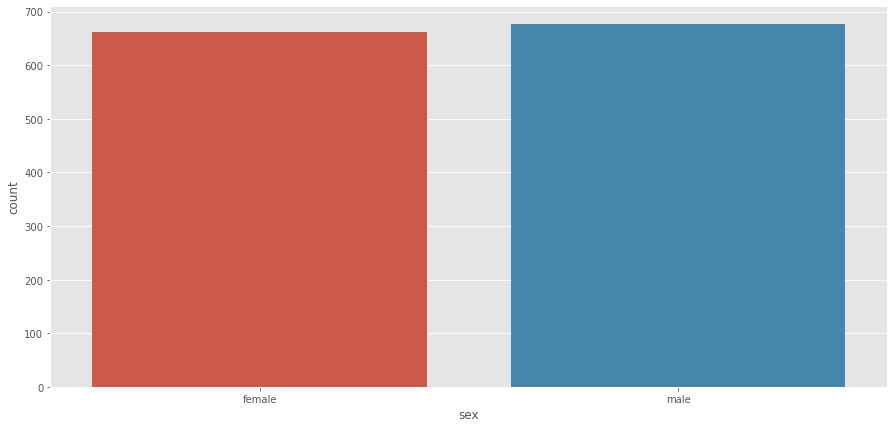

In [14]:
plt.figure(figsize=(15,7))
sns.countplot(cost['sex']) ##여성과 남성의 비율이 비슷한 것을 볼 수있다.

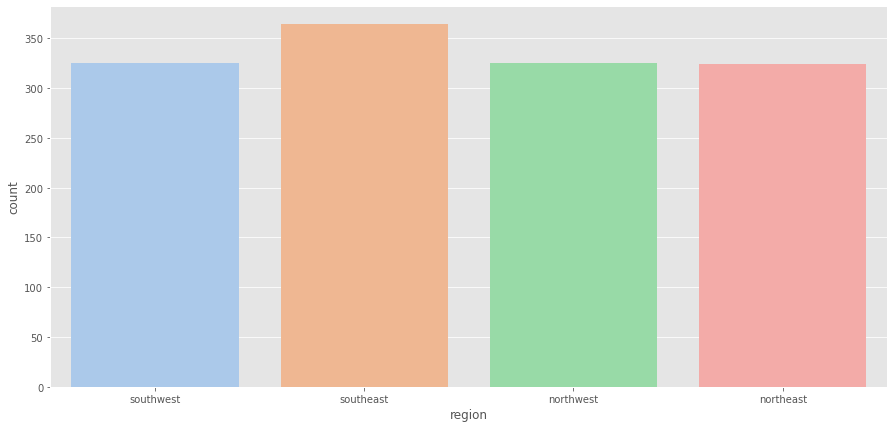

In [15]:
plt.figure(figsize=(15,7))
sns.countplot(cost['region'],palette='pastel')

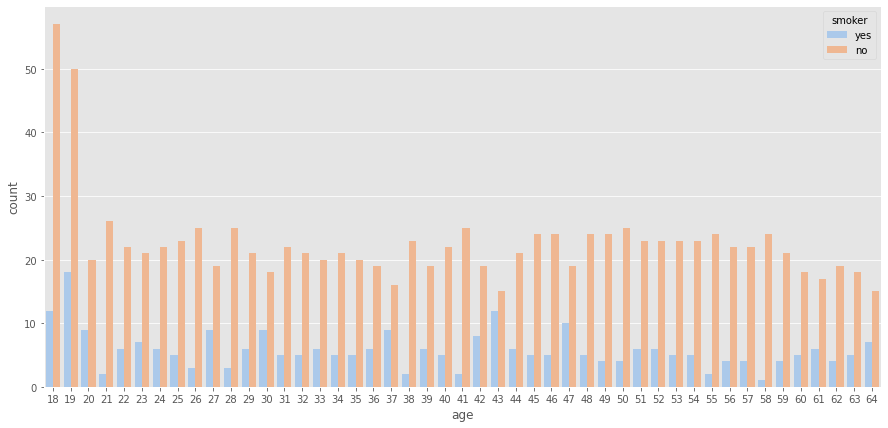

In [16]:
plt.figure(figsize=(15,7))
sns.countplot(cost['age'],hue=cost['smoker'],palette='pastel')

성별과 나이에 관련하여 흡연자수를 분석해보았는데, 19세 흡연자 수가 제일 많았고, 남자흡연자 수가 여자흡연자 수보다 많은 것을 확인할 수 있었다.

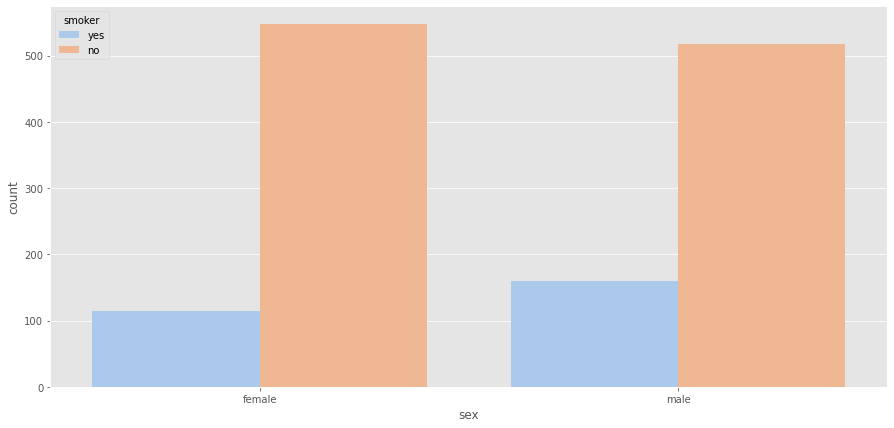

In [17]:
plt.figure(figsize=(15,7))
sns.countplot(cost['sex'],hue=cost['smoker'],palette='pastel')

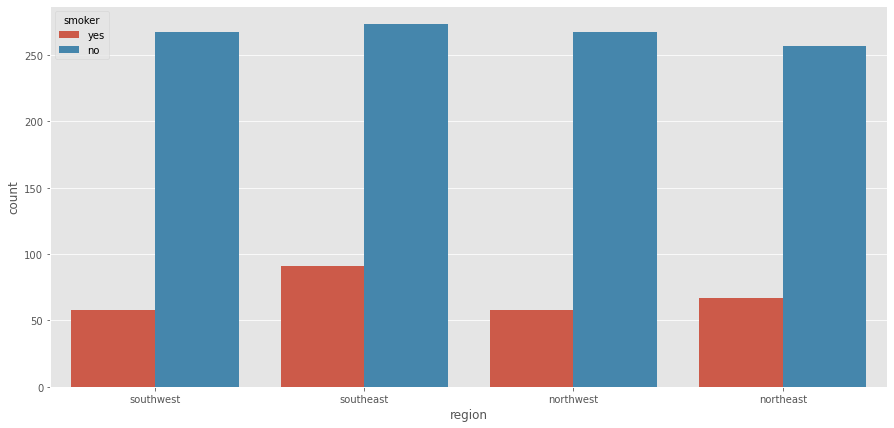

In [18]:
plt.figure(figsize=(15,7))
sns.countplot(cost['region'],hue=cost['smoker'])

탐색은 여기까지 하도록 하고, 

### 그렇다면 medical cost에 가장 많은 영향을 주는 요소는 무엇일까?

각 factor들의 영향도를 분석해보고자 
1. region 
2. age
3. bmi
4. sex
5. children
6. smoker

순서로 분석해보도록 하겠다. 

### 아래 그래프를 통해 지역에 따라서 보았을땐, region이 중요요소라고 할만한 증거가 충분하지 않았다.

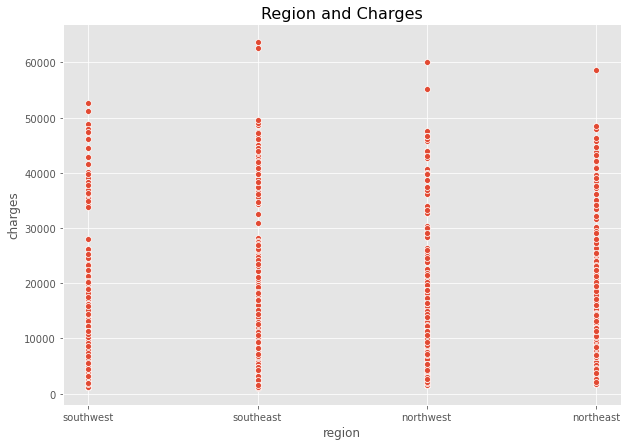

In [19]:
plt.figure(figsize=(10,7))
plt.title('Region and Charges',size='16')
sns.scatterplot(x=cost['region'],y=cost['charges'])
plt.show()


### 나이와 비용으로 보았을땐, 점진적으로 나이가 올라갈수록 비용또한 올라가는 것을 확인할 수 있다. 
### 결론적으로 AGE가 어느정도 medical cost에 영향을 주는 요소임을 확인할 수 있다.

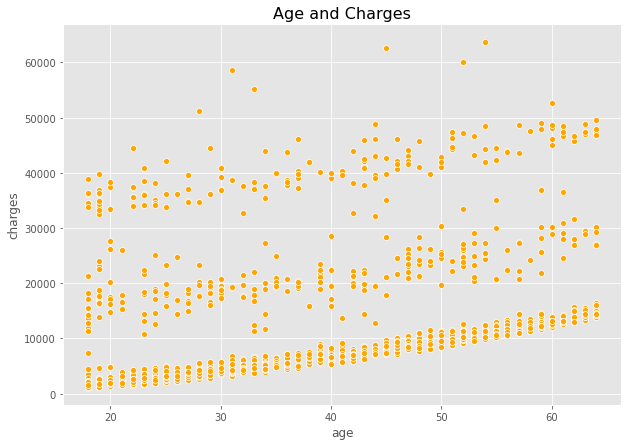

In [20]:
plt.figure(figsize=(10,7))
plt.title('Age and Charges',size='16')
sns.scatterplot(x=cost['age'],y=cost['charges'],color='orange')
plt.show()


### BMI가 30이상으로 갈수록 비용이 높은곳의 분포도가 높아지는 것을 확인할 수 있다.

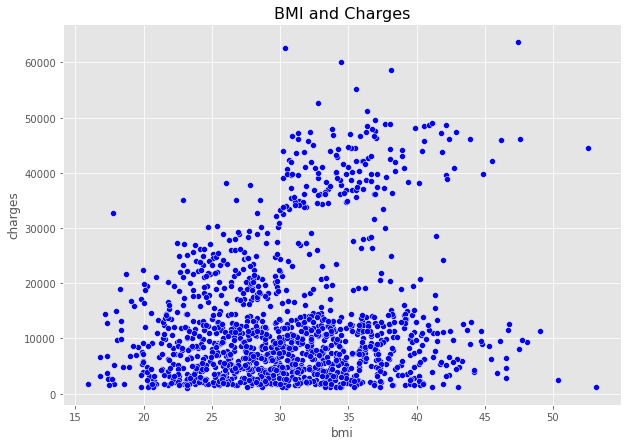

In [265]:
plt.figure(figsize=(10,7))
plt.title('BMI and Charges',size='16')
sns.scatterplot(x=cost['bmi'],y=cost['charges'],color='blue')
plt.show()

### 성별로만 따졌을때 비용에 영향을 미치는것을 명확하게 확신할 수 없다.

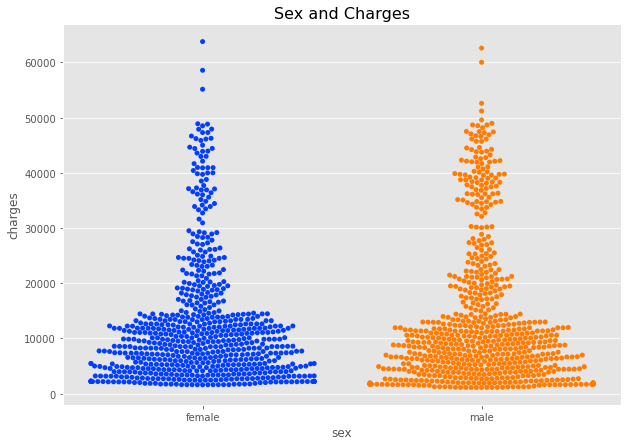

In [266]:
plt.figure(figsize=(10,7))
plt.title('Sex and Charges',size='16')
sns.swarmplot(x=cost['sex'],y=cost['charges'],palette='bright')
plt.show()

### 부양가족수로 따졌을 때에도, 부양자수가 많을수록 비용이 늘어난다라고 단정짓기 어렵다.

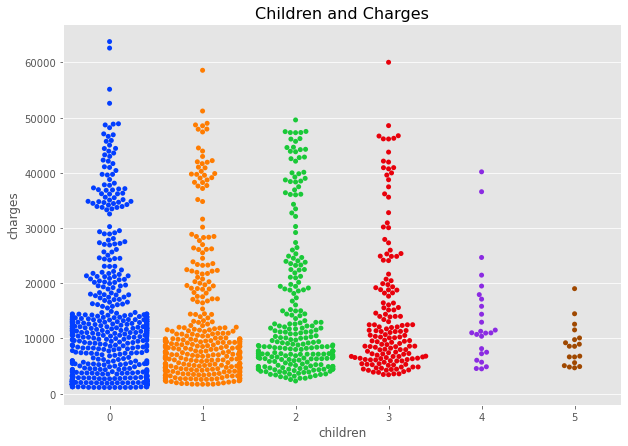

In [21]:
plt.figure(figsize=(10,7))
plt.title('Children and Charges',size='16')
sns.swarmplot(x=cost['children'],y=cost['charges'],palette='bright')
plt.show()

### 마지막으로 흡연에 따른 비용을 알아보았는데,
### 놀랍게도 흡연자의 비용이 비흡연자보다 훨씬 평균적으로 높다는것을 확인할 수 있다.

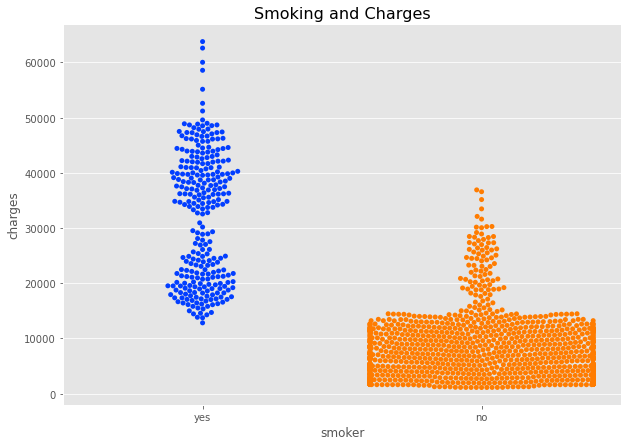

In [270]:
plt.figure(figsize=(10,7))
plt.title('Smoking and Charges',size='16')
sns.swarmplot(x=cost['smoker'],y=cost['charges'],palette='bright')
plt.show()

결과적으로 **흡연여부**가 medical cost를 결정하는데 가장 큰 요인이고, 그다음으로 BMI와 나이가 중요한 요소라 생각하여

**나이와 흡연여부간 그래프, BMI와 흡연여부간 그래프**를 도출해 보았다.

결과를 보아 나이가 많고 흡연을 하는사람이 보다 많은 비용을 지불하고 있었고, 또한
BMI가 높고 흡연을 하는사람이 보다 많은 비용을 지불하고 있었다.

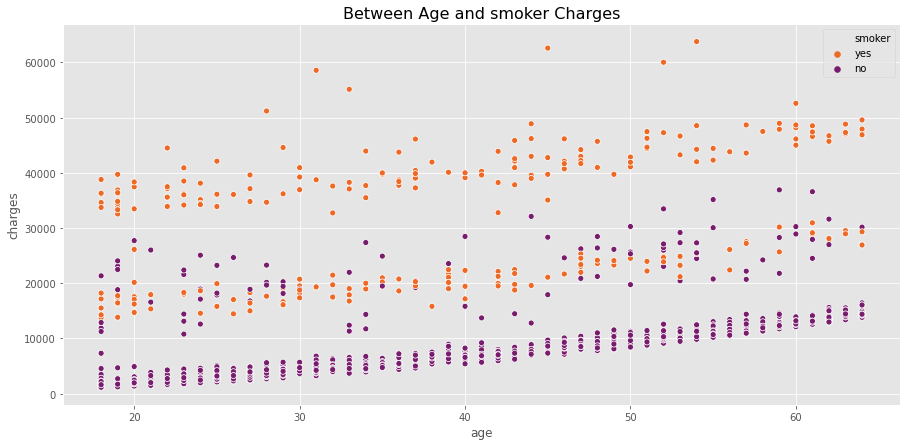

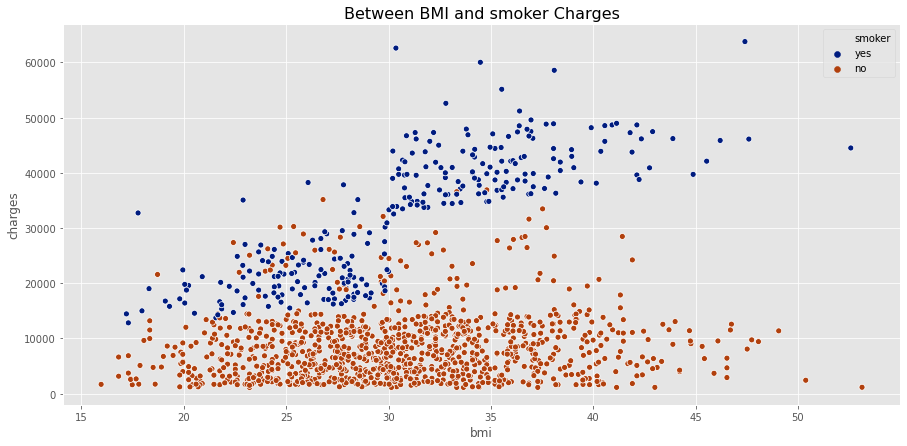

In [85]:
plt.figure(figsize=(15,7))
plt.title('Between Age and smoker Charges',size='16')
sns.scatterplot(x=cost['age'],y=cost['charges'],hue=cost['smoker'],palette='inferno_r')
plt.show()

plt.figure(figsize=(15,7))
plt.title('Between BMI and smoker Charges',size='16')
sns.scatterplot(x=cost['bmi'],y=cost['charges'],hue=cost['smoker'],palette='dark')
plt.show()

# 5.선형회귀를 이용한 Medical cost 값 예측


우선 모델링을 하기전에, get_dummies 함수를 이용하여 region,sex,smoker을 가변수화 시켜준다.
수치형 데이터로 바꾸게 되면 서로간의 관계성이 생기기 때문에, 잘못된 학습이 일어날 수 있으므로 더미로 만든 가변수로 변환한다.

In [25]:
cost_reg = pd.get_dummies(data=cost,columns=['sex','smoker','region'],drop_first=True)

cost_reg.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


In [41]:
X = cost_reg.drop('charges',axis=1)
y = cost_reg['charges']

## medical cost. 즉 charges를 예측하기 위해 두 데이터프레임을 분류해준다.

Scikit-Learn에서 제공하는 스케일러중, 
평균과 표준편차를 사용하는 기본스케일을 이용한다. 
사용방법을 가져온 곳을 첨부하였다.
https://mkjjo.github.io/python/2019/01/10/scaler.html
    
from sklearn.preprocessing import StandardScaler

standardScaler = StandardScaler()

print(standardScaler.fit(train_data))

train_data_standardScaled = standardScaler.transform(train_data)

In [63]:
xtrain,xtest,ytrain,ytest = train_test_split(X,y,train_size=0.20,random_state=1)

transform 관련 자료
https://deepinsight.tistory.com/165

In [104]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

ss=StandardScaler()
xtrain[['age','bmi']]=ss.fit_transform(xtrain[['age','bmi']])
xtest[['age','bmi']]=ss.transform(xtest[['age','bmi']])

In [105]:
xtrain.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
1213,1.017503,0.374354,0.699602,0,0,0,0,1
230,0.284044,0.848509,-0.130592,0,0,1,0,0
652,0.724120,0.018943,-0.960786,0,0,0,1,0
70,-0.816145,-1.026000,-0.960786,0,1,0,1,0
610,0.650774,-0.269317,-0.130592,0,0,0,1,0


from sklearn.linear_model import LinearRegression 사용방법에 대한 참고자료
https://tensorflow.blog/2018/11/15/%EC%82%AC%EC%9D%B4%ED%82%B7%EB%9F%B0-%EC%A0%95%EC%A3%BC%ED%96%89-1-linearregression/

In [112]:
lr=LinearRegression()
lr.fit(xtrain,ytrain)
lr.score(xtest,ytest)

y_train_pred = lr.predict(xtrain)
y_test_pred = lr.predict(xtest)

print(lr.score(xtest,ytest))

0.7383869785463821


In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container {width:90% !important;}</style>"))